In [67]:
import pandas as pd
import streamlit as st

In [65]:
df_dados = pd.read_csv("dados.csv")

In [21]:
df_dados #datafframe

,nome,idade,salario,departamento
0,Alice,25,3000,Vendas
1,Bruno,34,4500,TI
2,Carlos,29,3200,Vendas
3,Daniela,42,5200,RH
4,Eduardo,31,4100,TI
5,Fernanda,28,3800,RH
6,Gabriel,35,4700,Vendas
7,Helena,30,4000,TI


In [22]:
df_dados.head() #os 5 primeiros

,nome,idade,salario,departamento
0,Alice,25,3000,Vendas
1,Bruno,34,4500,TI
2,Carlos,29,3200,Vendas
3,Daniela,42,5200,RH
4,Eduardo,31,4100,TI


In [23]:
df_dados.info() # informações básicas

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   nome          8 non-null      object
 1   idade         8 non-null      int64 
 2   salario       8 non-null      int64 
 3   departamento  8 non-null      object
dtypes: int64(2), object(2)
memory usage: 388.0+ bytes


In [ ]:
#média da coluna numérica chamada idade.
soma = df_dados ["idade"].sum()
media = soma/7
media_idade = (f'{media:.2f}')
print (media_idade)

36.29


In [25]:
#valor mínimo e máximo da coluna chamada salario.
min_salario = df_dados ["salario"].min()
max_salario = df_dados ["salario"].max()


In [26]:
#todos os valores únicos de uma coluna chamada departamento.
valor_unico = df_dados["departamento"].unique()
print (valor_unico)

['Vendas' 'TI' 'RH']


In [27]:
#idade é maior que 30.
maior_30 =df_dados [df_dados["idade"]> 30]

In [28]:
#filtroS
filtro_vendas = df_dados ["departamento"] == "Vendas"
filtro_rh = df_dados ["departamento"] == "RH"
filtro_ti = df_dados ["departamento"] == "TI"

In [60]:
#Selecionar as colunas nome e salario de todos os funcionários do departamento Vendas.
nome_salario = df_dados.loc[filtro_vendas ,["nome", "salario"]]
print (nome_salario) 

      nome  salario
0    Alice     3000
2   Carlos     3200
6  Gabriel     4700


In [61]:
#Crie uma nova coluna chamada bonus que é 10% do valor da coluna salario, Adicione uma coluna chamada salario_total que soma salario e bonus.
df_dados ['bonus'] = df_dados ['salario']*0.1
df_dados ["salario total"] = df_dados ["bonus"] + df_dados ["salario"]
df_dados

,nome,idade,salario,departamento,bonus,salario total
0,Alice,25,3000,Vendas,300.0,3300.0
1,Bruno,34,4500,TI,450.0,4950.0
2,Carlos,29,3200,Vendas,320.0,3520.0
3,Daniela,42,5200,RH,520.0,5720.0
4,Eduardo,31,4100,TI,410.0,4510.0
5,Fernanda,28,3800,RH,380.0,4180.0
6,Gabriel,35,4700,Vendas,470.0,5170.0
7,Helena,30,4000,TI,400.0,4400.0


In [31]:
#calculo da soma de cada departamento
soma_vendas = df_dados.loc[filtro_vendas ,["salario total"]].sum()
soma_rh =  df_dados.loc[filtro_rh, ["salario total"]].sum()
soma_ti = df_dados.loc[filtro_ti, ["salario total"]].sum()


In [32]:
#media de cada departamento
media_vendas = soma_vendas / 3
media_rh = soma_rh / 2
media_ti = soma_ti / 3

In [33]:
#Conte o número de funcionários em cada departamento.
contagem_departamento = df_dados["departamento"].value_counts()

In [34]:
import matplotlib.pyplot as plt

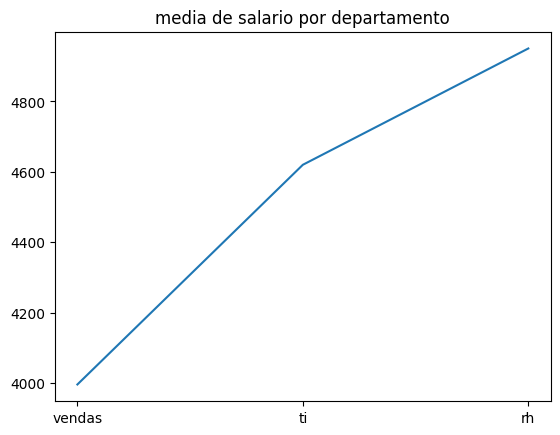

In [35]:
#grafico de vendas
plt.plot(["vendas", "ti", "rh"], [media_vendas, media_ti, media_rh])
plt.title('media de salario por departamento')
plt.xlabel('')
plt.ylabel('')
plt.show()

In [36]:
idade = df_dados ['idade']
print (idade)

0    25
1    34
2    29
3    42
4    31
5    28
6    35
7    30
Name: idade, dtype: int64


(array([1., 1., 2., 1., 0., 2., 0., 0., 0., 1.]),
 array([25. , 26.7, 28.4, 30.1, 31.8, 33.5, 35.2, 36.9, 38.6, 40.3, 42. ]),
 <BarContainer object of 10 artists>)

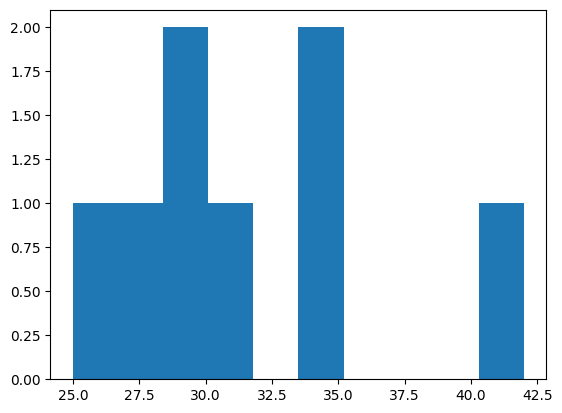

In [37]:
#histograma de idade
plt.hist(idade)

In [66]:
df_dados_at = {
  "media de idade": [media_idade],
  "valor minimo":[min_salario],
  "valor maximo":[max_salario],
  "departamento unico": [", ".join(valor_unico)],  
  "media vendas":[[media_vendas]],
  "media_rh":[[media_rh]],
  "media_ti":[[media_ti]],
  "Contagem Funcionários Vendas": [contagem_departamento.get("Vendas", 0)],
  "Contagem Funcionários RH": [contagem_departamento.get("RH", 0)],
  "Contagem Funcionários TI": [contagem_departamento.get("TI", 0)],
}
df_resumo = pd.DataFrame(df_dados_at)
df_resumo

,media de idade,valor minimo,valor maximo,departamento unico,media vendas,media_rh,media_ti,Contagem Funcionários Vendas,Contagem Funcionários RH,Contagem Funcionários TI
0,36.29,3000,5200,"Vendas, TI, RH",[[3996.6666666666665]],[[4950.0]],[[4620.0]],3,2,3
